In [1]:
# 1) designing model(input, output size, forward pass)
# 2) construcr loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass : gradients
# - update weights


In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
    
n_samples, n_features = X.shape

In [4]:
# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


In [5]:
# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1) % 10 == 0 :
        print(f'epoch: {epoch+1}, loss = {loss.item():4f}')
        

epoch: 10, loss = 4374.314941
epoch: 20, loss = 3261.941650
epoch: 30, loss = 2457.716309
epoch: 40, loss = 1875.621826
epoch: 50, loss = 1453.866211
epoch: 60, loss = 1147.988281
epoch: 70, loss = 925.952332
epoch: 80, loss = 764.644775
epoch: 90, loss = 647.367249
epoch: 100, loss = 562.041748


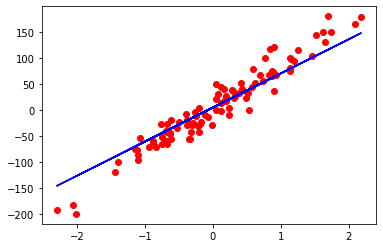

In [8]:
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()